# Оптимизация потерь в задачах классификации

В столбцах prediction1,2,3 данных содержатся результаты предсказания соответствия классу 1 некоторых классификаторов (трех вариантов глубокой нейронной сети) для тестовой выборки. Столбец label содержит истинные классы объектов. 

## Задание 1
  
Постройте кривую ошибок для каждой нейросети. Чем они отличаются? Площадь под какой кривой больше? Трансформируйте предсказания нейросетей в вероятности класса 1 (далее будем обозначать их probabilities), предполагая, что тестовая выборка распределена точно так же, как и будут распределены объекты в будущем, к которым наш алгоритм планируется применять. Для этого можно действовать следующим образом. Для каждого значения, возвращаемого нейросетью, взять несколько похожих значений и вычислить среди них процент класса 1, т.е. по сути применить метод ближайших соседей к данным: x - предсказания нейросети, y - истинные классы.

## Задание 2 
 
  Для каждой из нижеследующих задач составьте функцию потерь/прибыли в результате ошибочных/правильных ответов алгоритма. Для этого придумайте/найдите в интернете разумные величины штрафов и напишите их словесное обоснование (т.е. восполните недостающие данные в постановке задачи). Найдите оптимальное пороговое значение (или decision function) для каждой из нейросетей и выясните, какие из них рентабельны и какая приносит наибольшую прибыль?
  
1. Задача выдачи кредита размером 1 млн. руб на 1 год. probabilities - вероятности возврата кредита клиентами. Ставка по кредиту: 4%. 
  
2. Задача предсказания существенного взлета курса акции/валюты в течении следующей недели более чем на 5%. 
  
3. Задача предсказания определенного типа онкологии в частной клинике. probabilities - вероятность плохого диагноза. Алгоритм должен принять решение: а) лечить от онкологии опасными средствами, б) лечить от похожей болезни безопасными методами, в) отказаться от лечения. Лечение опасно (с вероятностью 60% пациент станет инвалидом III группы), но существенно продлевает жизнь.
  
4. Задача определения оптимальной цены страховки в зависимости от вероятности (probabilities) клиента попасть в аварию с ценой ремонта более 20 тыс. руб в будущем году. 

5. Разработка медицинского теста коронавируса, который будет использоваться в качестве официального (т.е. в случае положительного результата человека отправляют на больничный (1 неделя), выдают бесплатно лекарства и бесплатно проводят дезинфекцию в квартире).
  
6. Задача предсказания брака изделия (стоимость изделия - 10 тыс руб).

## Полезные кусочки кода

### Построение кривой ошибок расчет площади под ней:

```
fpr, tpr, _ = sklearn.metrics.roc_curve(true_class, prediction)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()
print('Площадь под кривой =', sklearn.metrics.roc_auc_score(true_class, prediction) )
```

### Продвинутый алгоритм вычисления вероятностей - метод парзеновского окна:

```
from statsmodels.nonparametric.kernel_regression import KernelReg
kr = KernelReg(endog=y, exog=x, var_type='c', bw=[0.2])
prob, _ = kr.fit(x)
```

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from statsmodels.nonparametric.kernel_regression import KernelReg 

# Задание 1

Постройте кривую ошибок для каждой нейросети. Чем они отличаются? Площадь под какой кривой больше? 

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head(10)

,prediction1,prediction2,prediction3,label
0,1.000000,1.000000,-1.000000,1.0
1,-0.019702,0.036304,0.180918,1.0
2,-0.019502,0.036504,0.181318,1.0
3,-0.019302,0.036704,0.181718,1.0
4,-0.019102,0.036904,-0.778978,1.0
5,-0.018702,0.037104,0.182118,1.0
6,-0.018502,0.037504,0.182518,1.0
7,-0.018302,0.037704,0.182918,1.0
8,-0.018102,0.037904,0.183118,1.0
9,-0.017502,0.038104,0.180518,1.0


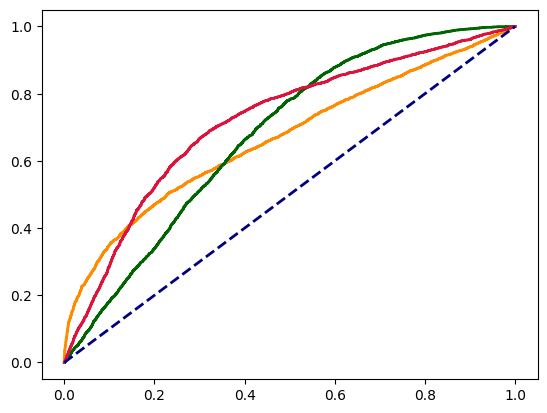

Площадь под кривой 1 = 0.6671505442711548
Площадь под кривой 2 = 0.6775762095207255
Площадь под кривой 3 = 0.7174794243839776


In [ ]:
fpr1, tpr1, _ = roc_curve(data.label, data.prediction1)
fpr2, tpr2, _ = roc_curve(data.label, data.prediction2)
fpr3, tpr3, _ = roc_curve(data.label, data.prediction3)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2)
plt.plot(fpr2, tpr2, color='darkgreen', lw=2)
plt.plot(fpr3, tpr3, color='crimson', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()
print(f'Площадь под кривой 1 = {roc_auc_score(data.label, data.prediction1)}\nПлощадь под кривой 2 = {roc_auc_score(data.label, data.prediction2)}\nПлощадь под кривой 3 = {roc_auc_score(data.label, data.prediction3)}' )

Вывод: На графике видно, что при варьировании порога зависимости TPR от FPR различаются для всех трех кривых. То есть эти сети отличаются оптимальными пороговыми значениями вероятности. 

Наибольшая площадь образуется под кривой для 3-ей нейронной сети и равна приблизительно 0.72.

Трансформируйте предсказания нейросетей в вероятности класса 1 (далее будем обозначать их probabilities), предполагая, что тестовая выборка распределена точно так же, как и будут распределены объекты в будущем, к которым наш алгоритм планируется применять.

In [ ]:
x1 = data.prediction1
x2 = data.prediction2
x3 = data.prediction3
y = data.label

kr = KernelReg(endog=y, exog = x1, var_type='c', bw=[0.2])
prob1, _ = kr.fit(x1)
kr = KernelReg(endog=y, exog = x2, var_type='c', bw=[0.2])
prob2, _ = kr.fit(x2)
kr = KernelReg(endog=y, exog = x3, var_type='c', bw=[0.2])
prob3, _ = kr.fit(x3)

In [ ]:
data['prob1'] = prob1
data['prob2'] = prob2
data['prob3'] = prob3

In [ ]:
data.head()

,prediction1,prediction2,prediction3,label,prob1,prob2,prob3
0,1.000000,1.000000,-1.000000,1.0,0.970837,0.666735,0.282303
1,-0.019702,0.036304,0.180918,1.0,0.441391,0.606822,0.609297
2,-0.019502,0.036504,0.181318,1.0,0.441413,0.606854,0.609481
3,-0.019302,0.036704,0.181718,1.0,0.441435,0.606886,0.609665
4,-0.019102,0.036904,-0.778978,1.0,0.441457,0.606918,0.290569


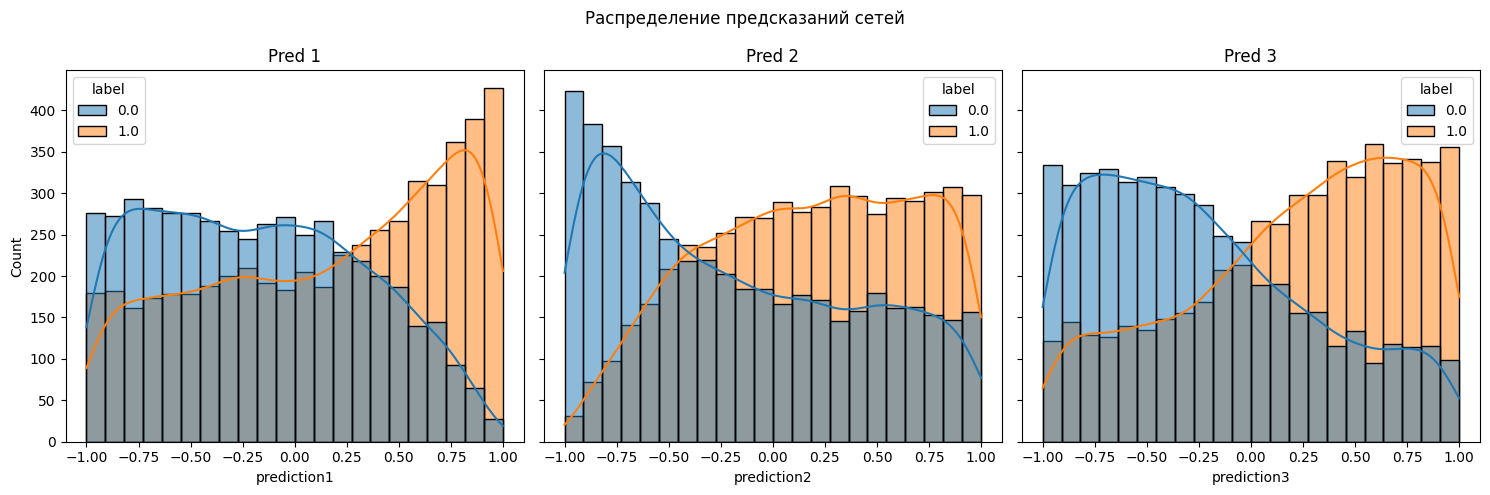

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5), sharey = True)
fig.suptitle('Распределение предсказаний сетей')

sns.histplot(ax=axis[0], data=data, x="prediction1", hue=data.label, kde=True)
axis[0].set_title('Pred 1')

sns.histplot(ax=axis[1], data=data, x="prediction2", hue=data.label, kde=True)
axis[1].set_title('Pred 2')

sns.histplot(ax=axis[2], data=data, x="prediction3", hue=data.label, kde=True)
axis[2].set_title('Pred 3')

fig.tight_layout()
plt.show()

Как распределены вероятности в результате применения KernelReg:

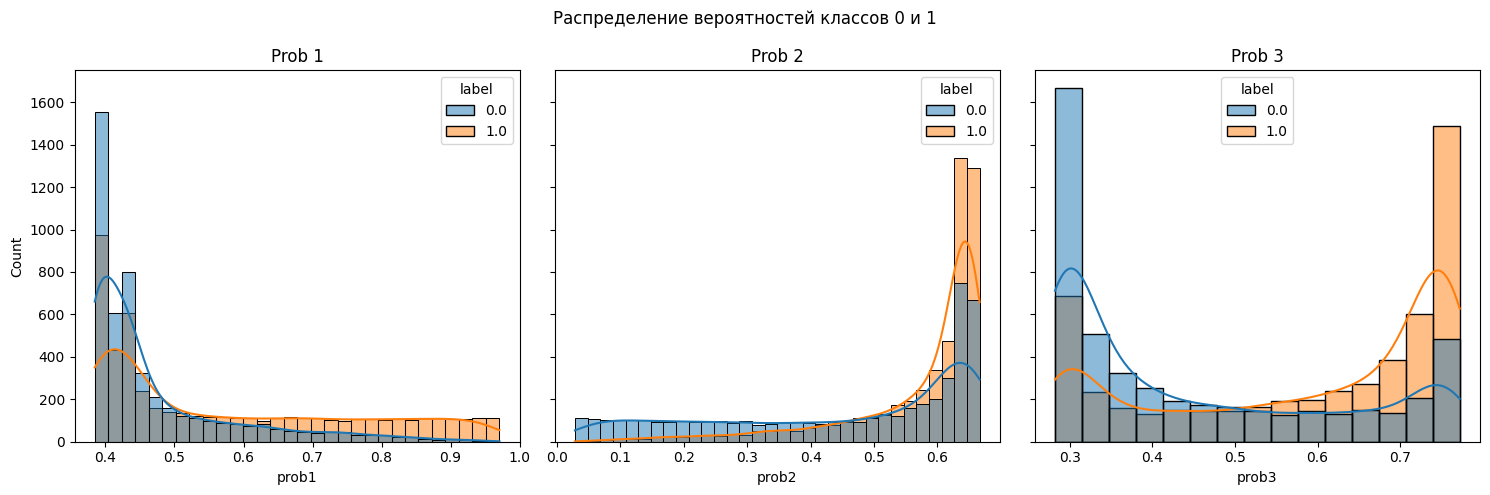

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5), sharey = True)
fig.suptitle('Распределение вероятностей классов 0 и 1')

sns.histplot(ax=axis[0], data=data, x="prob1", hue=data.label, kde=True)
axis[0].set_title('Prob 1')

sns.histplot(ax=axis[1], data=data, x="prob2", hue=data.label, kde=True)
axis[1].set_title('Prob 2')

sns.histplot(ax=axis[2], data=data, x="prob3", hue=data.label, kde=True)
axis[2].set_title('Prob 3')

fig.tight_layout()
plt.show()

## Задание 2 
 
  Для каждой из нижеследующих задач составьте функцию потерь/прибыли в результате ошибочных/правильных ответов алгоритма. Для этого придумайте/найдите в интернете разумные величины штрафов и напишите их словесное обоснование (т.е. восполните недостающие данные в постановке задачи). Найдите оптимальное пороговое значение (или decision function) для каждой из нейросетей и выясните, какие из них рентабельны и какая приносит наибольшую прибыль?

### 1. Задача выдачи кредита
Кредит размером 1 млн. руб на 1 год. probabilities - вероятности возврата кредита клиентами. Ставка по кредиту: 4%. 